In [2]:
import pandas as pd
import numpy as np

In [3]:
# Step 0: Read the data
athena = pd.read_csv("Athena_survey_data.csv")
athena

,gender,state,age,income,imp.challenge,imp.unlocks,imp.customize,imp.difficulty,imp.characters,imp.storyline,...,freq.customize,freq.test.world,gg.game.presented,gg.maxprice,rank.WarriorGuild,rank.SeraphGuardians,rank.Evercrest,rank.DevilsGate,rank.Marksman,rank.QuestoftheTitan
0,female,AZ,24,54000,5,6,7,4,6,5,...,4,7,Warrior Guild,50,4,1,3,5,6,2
1,male,FL,18,12000,4,2,5,3,4,6,...,6,6,Warrior Guild,34,5,3,1,4,6,2
2,male,IL,23,41000,7,5,2,5,3,4,...,2,5,Warrior Guild,42,2,1,5,3,4,6
3,male,CA,21,61000,4,3,4,6,1,2,...,5,2,Warrior Guild,55,1,3,5,2,4,6
4,male,FL,25,59000,6,4,3,6,3,2,...,2,4,Evercrest,49,2,1,4,5,3,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
822,female,LA,22,22000,4,3,6,4,4,6,...,5,3,Seraph Guardians,38,1,4,3,2,6,5
823,female,CA,24,34000,6,7,7,6,6,6,...,4,5,Seraph Guardians,48,4,1,3,6,5,2
824,female,LA,20,25000,4,4,3,3,6,7,...,4,5,Seraph Guardians,51,4,3,1,2,6,5
825,male,IL,25,56000,5,6,3,4,4,5,...,4,6,Evercrest,42,4,1,5,6,3,2


In [4]:
pip install factor-analyzer

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.5/42.5 kB 282.4 kB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 204.0/204.0 kB 4.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.9/98.9 kB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 14.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.9/468.9 kB 21.0 MB/s eta 0:00:00
  Created wheel for factor-analyzer: filename=factor_analyzer-0.5.0-py2.py3-none-any.whl size=42487 sha256=20ef91a2474531e1d5c29291eeeb19a564ffd81c86be3e6bfc44a772794e3e8b
  Stored in directory: /root/.cache/pip/wheels/74/a2/6c/26fb1addf1ce6c60a8cef8397f2999f0a1e6e2fcddc8abf33e
Successfully built factor-analyzer


In [5]:
# Step 1: Evaluate the data
# Bartlett's Test of Sphericity (we want p < 0.05 to go ahead)
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity

selected_columns_indices = list(range(4, 44))  # Assuming columns 4 to 43 are the ones you're interested in
selected_columns = athena.iloc[:, selected_columns_indices]

chi_square_value, p_value = calculate_bartlett_sphericity(selected_columns)
print(f"Bartlett's Test of Sphericity p-value: {p_value}")

# KMO-test (we want overall MSA > 0.6 to go ahead)
from factor_analyzer.factor_analyzer import calculate_kmo

kmo_all, kmo_model = calculate_kmo(selected_columns)
print(f"KMO-test overall MSA: {kmo_model}")

Bartlett's Test of Sphericity p-value: 0.0
KMO-test overall MSA: 0.8701380128313353


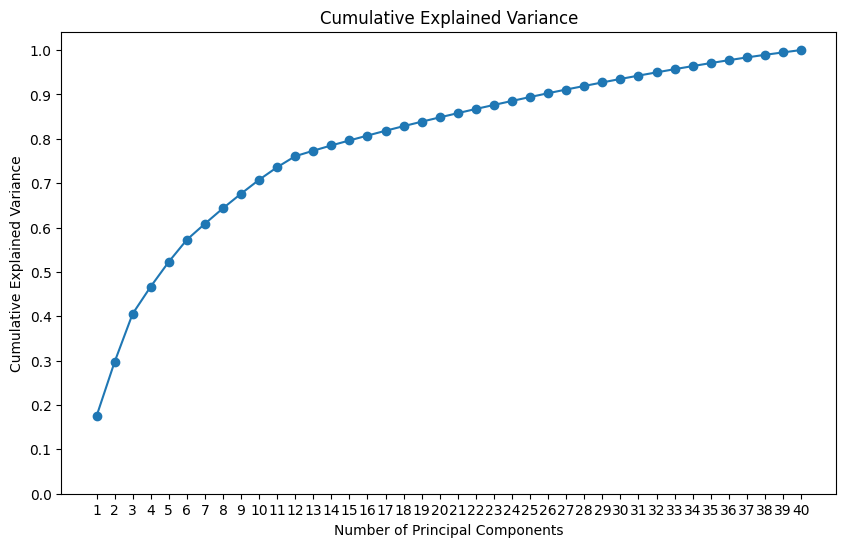

Eigenvalues (Explained Variance): [6.99670203 4.88863646 4.35620131 2.45163899 2.23872323 1.99262917
 1.44379198 1.39758246 1.31343252 1.25778586 1.13573613 0.99262882
 0.49515349 0.47821435 0.44820805 0.44104524 0.43468685 0.41502891
 0.40116737 0.3909749  0.38170652 0.37762322 0.36281221 0.36170064
 0.35245708 0.34510457 0.33208262 0.32153735 0.31991887 0.31195317
 0.30191319 0.29213323 0.28811272 0.27834207 0.27342393 0.26187468
 0.24805693 0.23465604 0.21797911 0.21506989]


In [6]:
# Step 2: Determine the number of factors
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Standardize the features (important for PCA)
scaler = StandardScaler()
athena_selected_columns = athena.iloc[:, 4:44]  # Adjust the columns based on your specific selection
athena_scaled = scaler.fit_transform(athena_selected_columns)

# Create and fit the PCA model
pca = PCA()
pca.fit(athena_scaled)

# Get the explained variance ratios
explained_variance_ratios = pca.explained_variance_ratio_

# Cumulative explained variance
cumulative_explained_variance = explained_variance_ratios.cumsum()

# Set the size of the figure
plt.figure(figsize=(10, 6))  # Adjust the size as needed

# Plot the explained variance ratios, want the factors to explain
# very roughly 70% or more of the variance
plt.plot(range(1, len(explained_variance_ratios) + 1), \
         cumulative_explained_variance, marker='o')
plt.title('Cumulative Explained Variance')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')

# Set X-axis ticks in increments of 1
plt.xticks(range(1, len(explained_variance_ratios) + 1))

# Set Y-axis ticks in increments of 0.1
plt.yticks([0.1 * i for i in range(int(max(cumulative_explained_variance)//0.1) + 2)])

plt.show()

# Display the eigenvalues; you may want values > 1
print("Eigenvalues (Explained Variance):", pca.explained_variance_)


In [7]:
# Step 3: Extract the factor solution (with varimax rotation)
from factor_analyzer import Rotator
from sklearn.decomposition import FactorAnalysis
import pandas as pd

rotator = Rotator()

# Specify the number of factors you want (n_components)
num_factors = 11

fa = FactorAnalysis(n_components=num_factors)
fa.fit(athena_scaled)
rotated_loading = rotator.fit_transform(fa.components_.T)

# Create a DataFrame with the rotated factor loadings
factor_loading_df = pd.DataFrame(rotated_loading, columns=[f'Factor {i+1}' for i in range(num_factors)], index=athena.columns[4:44])

# Export the DataFrame to Excel
excel_filename = "factor_understanding.xlsx"
factor_loading_df.to_excel(excel_filename)

print(f"Factor loadings exported to {excel_filename}")

Factor loadings exported to factor_understanding.xlsx


In [8]:
# Step 4: Create and name the factor scores
factor_scores = fa.transform(athena_scaled)

# Define the factor names
factor_names = [
    "Bounty Hunter",
    "Gardener",
    "Architect",
    "Slayer",
    "Lazy Slayer",
    "Loafing Acrobat",
    "Acrobat",
    "Gladiator",
    "Ninja",
    "Bard",
    "Skirmisher",
]

# Assign factor scores to the dataframe with the customized factor names
for i, factor_name in enumerate(factor_names):
    athena[factor_name] = factor_scores[:, i]

# Export the updated dataframe to a CSV file
csv_filename = "athena_with_factor_scores.csv"
athena.to_csv(csv_filename, index=False)

print(f"Athena dataframe with factor scores exported to {csv_filename}")

Athena dataframe with factor scores exported to athena_with_factor_scores.csv


<ipython-input-9-45b93184f74d>:13: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  hc = linkage(dissimilarity_matrix, method="ward")


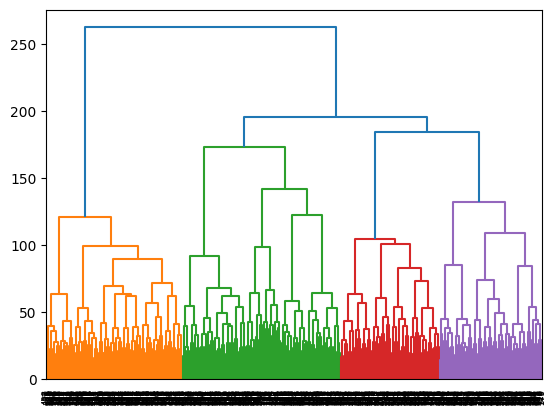

In [9]:
# Step 1: determine the number of clusters
# Option A: dendrogram
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

# Your data
data_for_clustering = athena.iloc[:, -11:]  # Adjust the columns based on your specific selection

# Calculate the dissimilarity matrix
dissimilarity_matrix = squareform(pdist(data_for_clustering, metric='euclidean'))
# perform hierarchical clustering using Ward's method on this matrix
hc = linkage(dissimilarity_matrix, method="ward")

# plot the resulting dendrogram
dendrogram(hc, leaf_font_size=6)
plt.show()

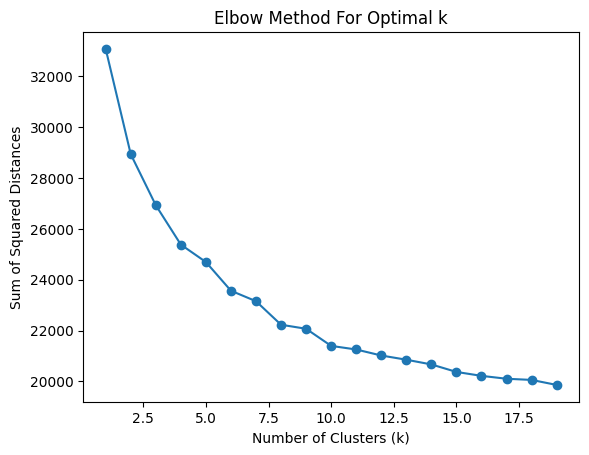

In [10]:
# Option B: The Elbow
from sklearn.cluster import KMeans

# Calculate the sum of squared distances for different values of k
sum_of_squared_distances = []
K_range = range(1, 20)  # You can adjust this range based on your problem
for k in K_range:
    kmeans = KMeans(n_clusters=k, n_init='auto')
    kmeans.fit(athena_scaled)
    sum_of_squared_distances.append(kmeans.inertia_)

# Plot the Elbow curve
plt.plot(K_range, sum_of_squared_distances, marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum of Squared Distances')
plt.show()

In [11]:
from sklearn.cluster import KMeans

# Specify the 11 factors for clustering
clustering_factors = [
    "Bounty Hunter",
    "Gardener",
    "Architect",
    "Slayer",
    "Lazy Slayer",
    "Loafing Acrobat",
    "Acrobat",
    "Gladiator",
    "Ninja",
    "Bard",
    "Skirmisher",
]

# Extract the relevant columns for clustering
data_for_clustering = athena[clustering_factors]

# Specify the number of clusters
num_clusters = 5

# Initialize KMeans with the specified number of clusters
kmeans = KMeans(n_clusters=num_clusters, random_state=11, n_init='auto')

# Add a new column with cluster assignment for each person
athena['Cluster'] = kmeans.fit_predict(data_for_clustering)

# Display the updated dataframe
print(athena)

     gender state  age  income  imp.challenge  imp.unlocks  imp.customize  \
0    female    AZ   24   54000              5            6              7   
1      male    FL   18   12000              4            2              5   
2      male    IL   23   41000              7            5              2   
3      male    CA   21   61000              4            3              4   
4      male    FL   25   59000              6            4              3   
..      ...   ...  ...     ...            ...          ...            ...   
822  female    LA   22   22000              4            3              6   
823  female    CA   24   34000              6            7              7   
824  female    LA   20   25000              4            4              3   
825    male    IL   25   56000              5            6              3   
826    male    OH   28   78000              3            3              3   

     imp.difficulty  imp.characters  imp.storyline  ...  Architect    Slaye

In [12]:
# Step 3: Interpret the K-means output
print("Cluster Centers:")
cluster_centers_df = pd.DataFrame(kmeans.cluster_centers_, columns=clustering_factors, \
                                   index=[f'Cluster {i}' for i in range(num_clusters)])
print(cluster_centers_df)

# Export the cluster centers DataFrame to a CSV file
csv_filename = "factor_cluster.csv"
cluster_centers_df.to_csv(csv_filename)

print(f"Cluster centers exported to {csv_filename}")

Cluster Centers:
           Bounty Hunter  Gardener  Architect    Slayer  Lazy Slayer  \
Cluster 0      -0.873637  0.021871  -0.777755  1.174751    -0.014535   
Cluster 1      -0.716224  0.514879  -0.193751 -0.937146     0.209360   
Cluster 2       0.569094 -0.957430  -0.267078 -0.231921     0.210124   
Cluster 3       1.078023  0.643490  -0.265981  0.027275    -0.341994   
Cluster 4      -0.309454 -0.205155   1.216477  0.204957    -0.043608   

           Loafing Acrobat   Acrobat  Gladiator     Ninja      Bard  \
Cluster 0        -0.070002  0.109999  -0.007986 -0.084569  0.062843   
Cluster 1        -0.189985  0.162398  -0.139443  0.204987 -0.043925   
Cluster 2         0.497640  0.351483  -0.129713  0.027276  0.010934   
Cluster 3        -0.328388 -0.205675  -0.068054 -0.141332 -0.034534   
Cluster 4         0.072464 -0.349647   0.314945 -0.013848  0.018290   

           Skirmisher  
Cluster 0   -0.043474  
Cluster 1    0.102637  
Cluster 2   -0.048150  
Cluster 3    0.001066  
Clu

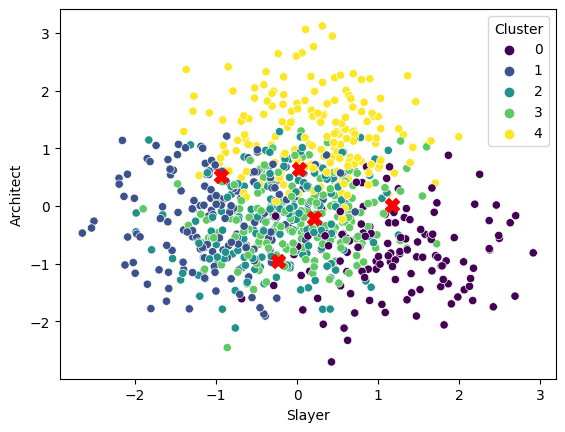

In [13]:
# Visualize K-means clusters
import seaborn as sns

sns.scatterplot(data=athena, x='Slayer',
                y='Architect',
                hue='Cluster', palette='viridis')
# Plot the cluster centers
plt.scatter(cluster_centers_df['Slayer'], cluster_centers_df['Gardener'], c='red', marker='X', s=100)

plt.show()

In [14]:
athena['Cluster_Label'] = athena['Cluster'].replace({0: 'Chaotic Thrill-Seekers', 1: 'Tactical Thinkers', 2: 'Strategic Explorers', 3: 'Immersive Power-Seekers', 4:'Cooperative Adventurers'})
athena

,gender,state,age,income,imp.challenge,imp.unlocks,imp.customize,imp.difficulty,imp.characters,imp.storyline,...,Slayer,Lazy Slayer,Loafing Acrobat,Acrobat,Gladiator,Ninja,Bard,Skirmisher,Cluster,Cluster_Label
0,female,AZ,24,54000,5,6,7,4,6,5,...,-1.279314,-0.966721,0.443075,0.482967,-0.899352,0.894280,-0.486405,0.236491,2,Strategic Explorers
1,male,FL,18,12000,4,2,5,3,4,6,...,-0.036203,0.015988,0.450966,-1.338000,0.165370,1.208355,-1.105522,1.135556,2,Strategic Explorers
2,male,IL,23,41000,7,5,2,5,3,4,...,-0.641119,-0.133101,0.130074,0.791712,0.814950,-1.159156,-1.156533,-0.478209,4,Cooperative Adventurers
3,male,CA,21,61000,4,3,4,6,1,2,...,-2.155789,0.384645,-1.398636,-0.867871,-0.119298,-1.245556,-0.342732,-0.063287,1,Tactical Thinkers
4,male,FL,25,59000,6,4,3,6,3,2,...,-0.290497,-0.098808,1.379733,-0.218033,0.763579,0.942529,-0.188121,-0.288558,4,Cooperative Adventurers
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
822,female,LA,22,22000,4,3,6,4,4,6,...,-1.210894,0.268080,-1.043730,0.693259,-0.262542,-0.031430,-0.334014,0.031200,2,Strategic Explorers
823,female,CA,24,34000,6,7,7,6,6,6,...,-0.774977,0.275813,0.278681,0.941048,-1.055430,0.130985,-1.618163,-0.260353,3,Immersive Power-Seekers
824,female,LA,20,25000,4,4,3,3,6,7,...,-0.883294,-0.224574,1.581370,1.581162,0.579768,-0.271671,-0.707659,1.269715,2,Strategic Explorers
825,male,IL,25,56000,5,6,3,4,4,5,...,-0.579015,-0.862934,0.782748,-1.222345,-0.992630,0.225553,0.390037,-0.200579,3,Immersive Power-Seekers


In [15]:
from scipy.stats import chi2_contingency
def xtab(d1, d2):
    crosstab = pd.crosstab(index=d1, columns=d2)
    chi2, p, _, expected = chi2_contingency(crosstab)
    contributions = (crosstab - expected) ** 2 / expected

    # Create a multi-index DataFrame
    index = pd.MultiIndex.from_product([crosstab.index, ['Observed', 'Expected', 'Chi squared']])
    columns = pd.MultiIndex.from_product([crosstab.columns])

    df = pd.DataFrame(index=index, columns=columns)

    # Fill in the DataFrame
    df.loc[crosstab.index, 'Observed', :] = crosstab.values
    df.loc[crosstab.index, 'Expected', :] = expected.round(2)
    df.loc[crosstab.index, 'Chi squared', :] = contributions.values.round(2)

    print(f"Chi-squared value: {chi2}")
    print(f"P-value: {p}")
    return(df)

In [16]:
xtab(athena['Cluster_Label'], athena['gender'])

Chi-squared value: 10.586772060306407
P-value: 0.226229918930682


gender                              female   male nonbinary
Cluster_Label                                              
Chaotic Thrill-Seekers  Observed        54     72         3
                        Expected     58.81  68.17      2.03
                        Chi squared   0.39   0.22      0.47
Cooperative Adventurers Observed        78    102         5
                        Expected     84.33  97.76      2.91
                        Chi squared   0.48   0.18       1.5
Immersive Power-Seekers Observed        80     94         3
                        Expected     80.69  93.53      2.78
                        Chi squared   0.01    0.0      0.02
Strategic Explorers     Observed        93     77         1
                        Expected     77.95  90.36      2.69
                        Chi squared    2.9   1.98      1.06
Tactical Thinkers       Observed        72     92         1
                        Expected     75.22  87.19      2.59
                        Chi squared   0.14   0.27      0.98

In [17]:
import pandas as pd
from scipy.stats import chi2_contingency

# Assuming 'age' and 'Cluster_Label' are columns in your 'athena' DataFrame
# Convert 'age' to categorical variable with bins
bins = [18, 25, 35, 45, 55, 65]
labels = ['18-25', '26-35', '36-45', '46-55', '56-65']
athena['Age_Group'] = pd.cut(athena['age'], bins=bins, labels=labels, right=False)

# Create dummies for the 'Age_Group' column
age_dummies = pd.get_dummies(athena['Age_Group'], prefix='Age')

# Perform cross-tabulation
xtab(athena['Cluster_Label'], athena['Age_Group'])

Chi-squared value: 156.6103201322476
P-value: 3.86093667710891e-25


Age_Group                            18-25  26-35  36-45  46-55 56-65
Cluster_Label                                                        
Chaotic Thrill-Seekers  Observed        60     43     20      4     2
                        Expected     63.72   44.2  11.56   4.53   5.0
                        Chi squared   0.22   0.03   6.17   0.06   1.8
Cooperative Adventurers Observed        96     72      6      8     3
                        Expected     91.38  63.38  16.57    6.5  7.17
                        Chi squared   0.23   1.17   6.75   0.35  2.42
Immersive Power-Seekers Observed        45     59     33     16    23
                        Expected     86.93   60.3  15.77   6.18  6.82
                        Chi squared  20.23   0.03  18.83  15.61  38.4
Strategic Explorers     Observed       118     51      2      0     0
                        Expected     84.46  58.59  15.32    6.0  6.62
                        Chi squared  13.31   0.98  11.58    6.0  6.62
Tactical Thinkers       Observed        89     58     13      1     4
                        Expected      81.5  56.53  14.78   5.79  6.39
                        Chi squared   0.69   0.04   0.21   3.97   0.9

In [18]:
import pandas as pd
from scipy.stats import chi2_contingency
# Define regions
region_mapping = {
    'Northeast': ['CT', 'ME', 'MA', 'NH', 'RI', 'VT', 'NY', 'NJ', 'PA'],
    'Midwest': ['IL', 'IN', 'MI', 'OH', 'WI', 'IA', 'KS', 'MN', 'MO', 'NE', 'ND', 'SD'],
    'South': ['DE', 'FL', 'GA', 'MD', 'NC', 'SC', 'VA', 'DC', 'WV', 'AL', 'KY', 'MS', 'TN', 'AR', 'LA', 'OK', 'TX'],
    'West': ['AZ', 'CO', 'ID', 'MT', 'NV', 'NM', 'UT', 'WY', 'AK', 'CA', 'HI', 'OR', 'WA']
}

# Create a new column 'Region' based on the state's region
athena['Region'] = athena['state'].apply(lambda x: next((region for region, states in region_mapping.items() if x in states), 'Other'))

# Perform cross-tab analysis
xtab(athena['Cluster_Label'], athena['Region'])

Chi-squared value: 12.26861487913476
P-value: 0.4243551739720102


Region                              Midwest Northeast  South   West
Cluster_Label                                                      
Chaotic Thrill-Seekers  Observed         20        24     58     27
                        Expected      24.18     23.09  49.76  31.98
                        Chi squared    0.72      0.04   1.36   0.77
Cooperative Adventurers Observed         32        38     76     39
                        Expected      34.67     33.11  71.36  45.86
                        Chi squared    0.21      0.72    0.3   1.03
Immersive Power-Seekers Observed         38        26     63     50
                        Expected      33.17     31.68  68.27  43.88
                        Chi squared     0.7      1.02   0.41   0.85
Strategic Explorers     Observed         33        35     55     48
                        Expected      32.05      30.6  65.96  42.39
                        Chi squared    0.03      0.63   1.82   0.74
Tactical Thinkers       Observed         32        25     67     41
                        Expected      30.93     29.53  63.65   40.9
                        Chi squared    0.04      0.69   0.18    0.0

In [19]:
import pandas as pd
import statsmodels.api as sm
from scipy.stats import chi2_contingency

X = pd.get_dummies(athena['Cluster'], drop_first=True, dtype=int)
X = sm.add_constant(X)
y = athena['age']
model = sm.OLS(y, X).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                    age   R-squared:                       0.174
Model:                            OLS   Adj. R-squared:                  0.170
Method:                 Least Squares   F-statistic:                     43.21
Date:                Sun, 17 Dec 2023   Prob (F-statistic):           6.20e-33
Time:                        02:18:34   Log-Likelihood:                -2968.7
No. Observations:                 827   AIC:                             5947.
Df Residuals:                     822   BIC:                             5971.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         27.6279      0.774     35.691      0.0

In [20]:
X = pd.get_dummies(athena['Cluster'], drop_first=True, dtype=int)
X = sm.add_constant(X)
y = athena['income']
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 income   R-squared:                       0.119
Model:                            OLS   Adj. R-squared:                  0.115
Method:                 Least Squares   F-statistic:                     27.86
Date:                Sun, 17 Dec 2023   Prob (F-statistic):           1.01e-21
Time:                        02:18:35   Log-Likelihood:                -9743.1
No. Observations:                 827   AIC:                         1.950e+04
Df Residuals:                     822   BIC:                         1.952e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.478e+04   2794.720     19.600      0.0

In [21]:
pip install statsmodels

In [22]:
filter_data = athena['gg.game.presented'] == 'Warrior Guild'
filtered_athena = athena[filter_data]
cumulative_wtp = pd.DataFrame(columns=['price', 'per_customers_wtp', 'pred_revenue'])

for price in np.arange(min(filtered_athena['gg.maxprice']), max(filtered_athena['gg.maxprice']) + 5, 5):
    num_respondents_wtp = sum(filtered_athena['gg.maxprice'] >= price)
    cumulative_wtp = pd.concat([cumulative_wtp, pd.DataFrame({
        'price': [price],
        'per_customers_wtp': [num_respondents_wtp / len(filtered_athena)],
        'pred_revenue': [num_respondents_wtp * price]
    })], ignore_index=True)
cumulative_wtp

,price,per_customers_wtp,pred_revenue
0,18,1.000000,4932
1,23,0.970803,6118
2,28,0.934307,7168
3,33,0.828467,7491
4,38,0.664234,6916
5,43,0.525547,6192
6,48,0.405109,5328
7,53,0.284672,4134
8,58,0.204380,3248
9,63,0.153285,2646


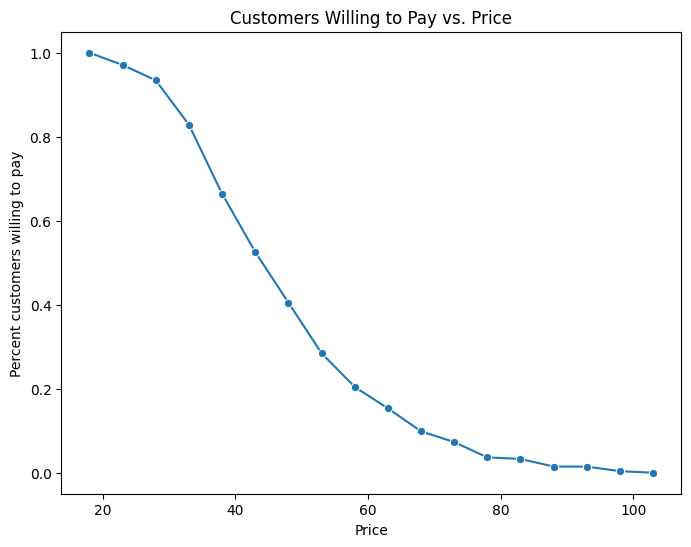

In [23]:
# Plot customers willing to pay
plt.figure(figsize=(8, 6))
sns.lineplot(x='price', y='per_customers_wtp', data=cumulative_wtp, marker='o')
plt.xlabel('Price')
plt.ylabel('Percent customers willing to pay')
plt.title('Customers Willing to Pay vs. Price')
plt.show()

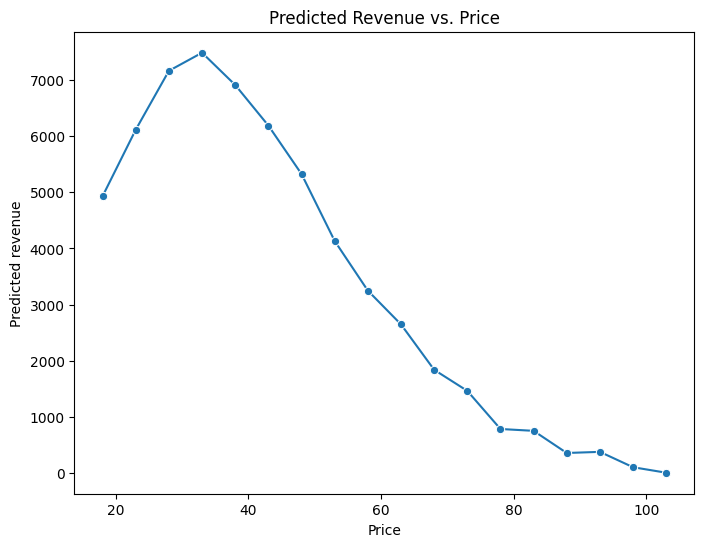

In [24]:
# Plot revenue
plt.figure(figsize=(8, 6))
sns.lineplot(x='price', y='pred_revenue', data=cumulative_wtp, marker='o')
plt.xlabel('Price')
plt.ylabel('Predicted revenue')
plt.title('Predicted Revenue vs. Price')
plt.show()

In [25]:
filter_data = filter_data.reset_index(drop=True)
filter_data = athena['gg.game.presented'] == 'Evercrest'
filtered_athena = athena[filter_data]
cumulative_wtp = pd.DataFrame(columns=['price', 'per_customers_wtp', 'pred_revenue'])

for price in np.arange(min(filtered_athena['gg.maxprice']), max(filtered_athena['gg.maxprice']) + 5, 5):
    num_respondents_wtp = sum(filtered_athena['gg.maxprice'] >= price)
    cumulative_wtp = pd.concat([cumulative_wtp, pd.DataFrame({
        'price': [price],
        'per_customers_wtp': [num_respondents_wtp / len(filtered_athena)],
        'pred_revenue': [num_respondents_wtp * price]
    })], ignore_index=True)
cumulative_wtp


,price,per_customers_wtp,pred_revenue
0,12,1.000000,3312
1,17,0.981884,4607
2,22,0.960145,5830
3,27,0.884058,6588
4,32,0.778986,6880
5,37,0.652174,6660
6,42,0.500000,5796
7,47,0.387681,5029
8,52,0.315217,4524
9,57,0.250000,3933


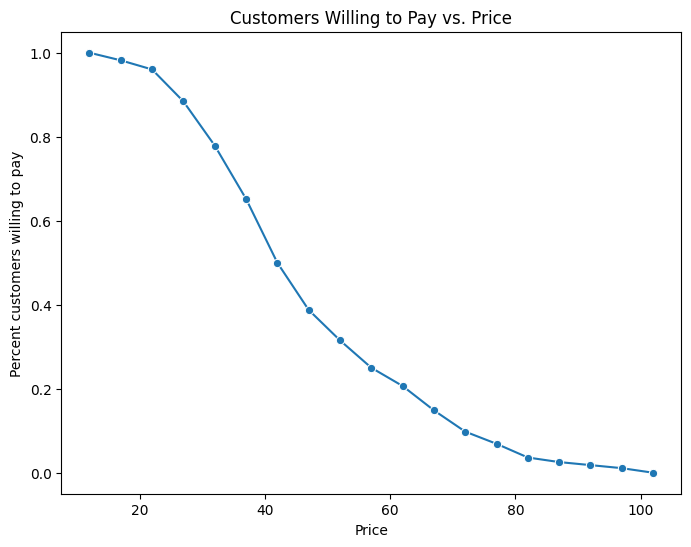

In [26]:
# Plot customers willing to pay
plt.figure(figsize=(8, 6))
sns.lineplot(x='price', y='per_customers_wtp', data=cumulative_wtp, marker='o')
plt.xlabel('Price')
plt.ylabel('Percent customers willing to pay')
plt.title('Customers Willing to Pay vs. Price')
plt.show()

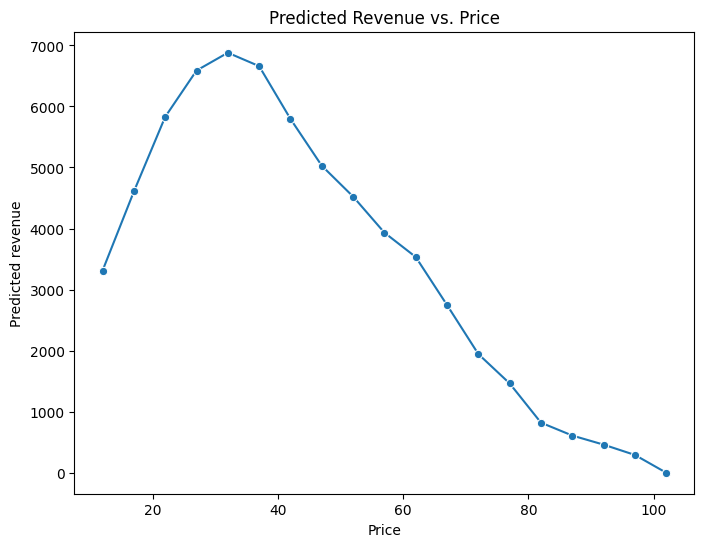

In [27]:
# Plot revenue
plt.figure(figsize=(8, 6))
sns.lineplot(x='price', y='pred_revenue', data=cumulative_wtp, marker='o')
plt.xlabel('Price')
plt.ylabel('Predicted revenue')
plt.title('Predicted Revenue vs. Price')
plt.show()

In [28]:
filter_data = filter_data.reset_index(drop=True)
filter_data = athena['gg.game.presented'] == 'Seraph Guardians'
filtered_athena = athena[filter_data]
cumulative_wtp = pd.DataFrame(columns=['price', 'per_customers_wtp', 'pred_revenue'])

for price in np.arange(min(filtered_athena['gg.maxprice']), max(filtered_athena['gg.maxprice']) + 5, 5):
    num_respondents_wtp = sum(filtered_athena['gg.maxprice'] >= price)
    cumulative_wtp = pd.concat([cumulative_wtp, pd.DataFrame({
        'price': [price],
        'per_customers_wtp': [num_respondents_wtp / len(filtered_athena)],
        'pred_revenue': [num_respondents_wtp * price]
    })], ignore_index=True)
cumulative_wtp

,price,per_customers_wtp,pred_revenue
0,15,1.000000,4155
1,20,0.992780,5500
2,25,0.967509,6700
3,30,0.902527,7500
4,35,0.823105,7980
5,40,0.711191,7880
6,45,0.599278,7470
7,50,0.483755,6700
8,55,0.371841,5665
9,60,0.299639,4980


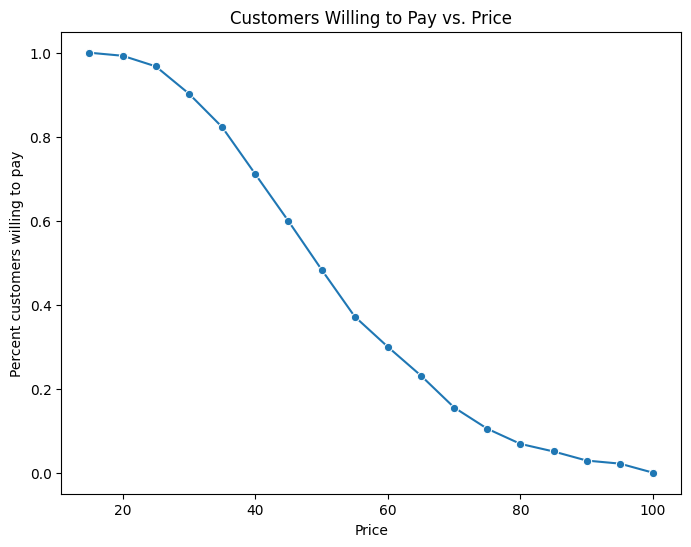

In [29]:
# Plot customers willing to pay
plt.figure(figsize=(8, 6))
sns.lineplot(x='price', y='per_customers_wtp', data=cumulative_wtp, marker='o')
plt.xlabel('Price')
plt.ylabel('Percent customers willing to pay')
plt.title('Customers Willing to Pay vs. Price')
plt.show()

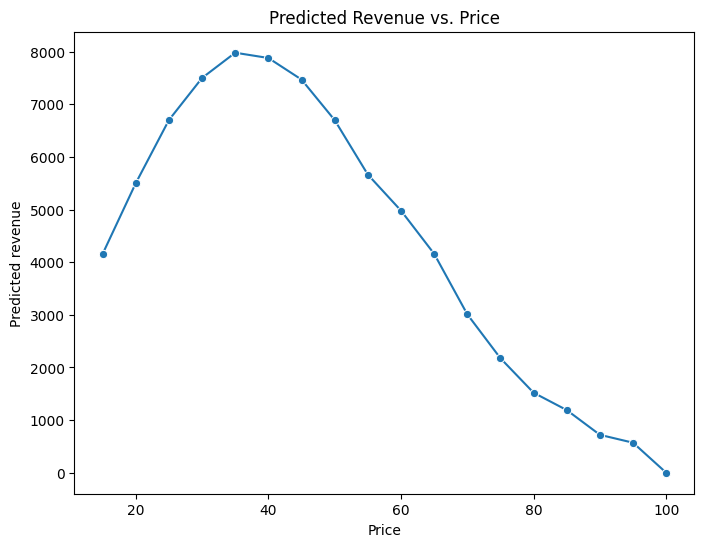

In [30]:
# Plot revenue
plt.figure(figsize=(8, 6))
sns.lineplot(x='price', y='pred_revenue', data=cumulative_wtp, marker='o')
plt.xlabel('Price')
plt.ylabel('Predicted revenue')
plt.title('Predicted Revenue vs. Price')
plt.show()

In [32]:
import pandas as pd
import statsmodels.api as sm

# Assuming 'athena' is your DataFrame

# Filter the data for 'Warrior Guild' in 'gg.game.presented'
filtered_data = athena[athena['gg.game.presented'] == 'Warrior Guild']

# Define the dependent variable (Y) and independent variable (X)
X = pd.get_dummies(filtered_data['Cluster'], drop_first=True, dtype=int)
X = sm.add_constant(X)
y = filtered_data['gg.maxprice'] # replace/rerun with other ratio demographic variables

# Perform linear regression
model = sm.OLS(Y, X).fit()

# Print the summary of the regression
print(model.summary())

NameError: ignored

In [ ]:
import pandas as pd
import statsmodels.api as sm

# Assuming 'athena' is your DataFrame

# Filter the data for 'Evercrest' in 'gg.game.presented'
filtered_data = athena[athena['gg.game.presented'] == 'Evercrest']

# Reset index to align the indices of X and Y
filtered_data = filtered_data.reset_index(drop=True)

# Define the dependent variable (Y) and independent variable (X)
X = pd.get_dummies(filtered_data['Cluster'], drop_first=True, dtype=int)
X = sm.add_constant(X)
Y = filtered_data['gg.maxprice']  # Ensure this is the correct column name

# Perform linear regression
model1 = sm.OLS(Y, X).fit()

# Print the summary of the regression
print(model1.summary())


In [ ]:
import pandas as pd
import statsmodels.api as sm

# Assuming 'athena' is your DataFrame

# Filter the data for 'Evercrest' in 'gg.game.presented'
filtered_data = athena[athena['gg.game.presented'] == 'Seraph Guardians']

# Reset index to align the indices of X and Y
filtered_data = filtered_data.reset_index(drop=True)

# Define the dependent variable (Y) and independent variable (X)
X = pd.get_dummies(filtered_data['Cluster'], drop_first=True, dtype=int)
X = sm.add_constant(X)
Y = filtered_data['gg.maxprice']  # Ensure this is the correct column name

# Perform linear regression
model1 = sm.OLS(Y, X).fit()

# Print the summary of the regression
print(model1.summary())